C:\Users\weerapat.sa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weerapat.sa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


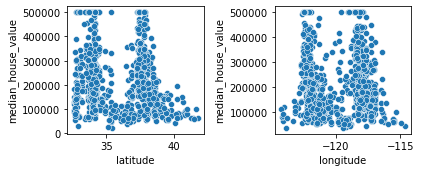

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
# อ่านไฟล์ข้อมูล
df = pd.read_csv('./Data/housing.csv')
# แบ่งข้อมูลเป็น test, train
(df_train,df_test) =train_test_split(df.copy(), test_size=0.2)
fig, axes = plt.subplots(1,2,figsize=(6,2.5))

sns.scatterplot('latitude','median_house_value',data=df_train.sample(1000),ax=axes[0])
sns.scatterplot('longitude','median_house_value',data=df_train.sample(1000),ax=axes[1])
fig.tight_layout()

In [60]:
?sns.scatterplot

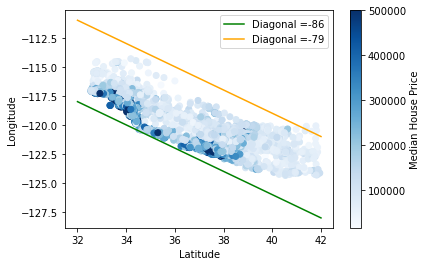

In [61]:
plt.scatter(df_train['latitude'],df_train['longitude'],c = df_train['median_house_value'],cmap= 'Blues')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
cb = plt.colorbar()
cb.set_label("Median House Price")
x = np.linspace(32, 42, 1000)
plt.plot(x,-86-x,label = 'Diagonal =-86',color='green')
plt.plot(x,-79-x,label = 'Diagonal =-79',color='orange')
plt.legend()

<AxesSubplot:xlabel='diagonal', ylabel='median_house_value'>

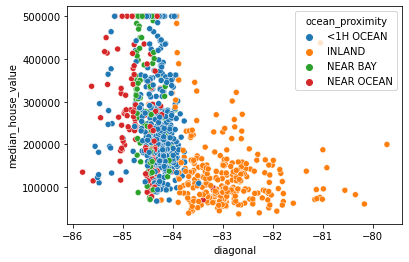

In [62]:
df_train['diagonal'] =df_train['latitude']+df_train['longitude']
df_test['diagonal'] =df_test['latitude']+df_test['longitude']
sns.scatterplot(x='diagonal',y='median_house_value',data=df_train.sample(1000),hue='ocean_proximity')

C:\Users\weerapat.sa\AppData\Local\Temp/ipykernel_7832/1815777842.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


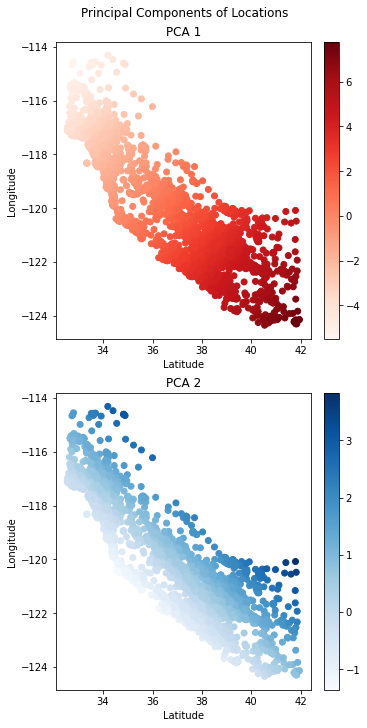

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_location = df_train[['latitude','longitude']]
pca_fit =pca.fit(train_location)
df_train[['PCA_1','PCA_2']]= pca_fit.transform(train_location)
test_location = df_test[['latitude','longitude']]
df_test[['PCA_1','PCA_2']]= pca_fit.transform(test_location)


fig, (ax1,ax2) = plt.subplots(2,1,constrained_layout= True,figsize=(5,10))
fig.suptitle('Principal Components of Locations')
ax1.title.set_text('PCA 1')
plot1 = ax1.scatter(df_train['latitude'],df_train['longitude'],c = df_train['PCA_1'],cmap= 'Reds')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
plt.colorbar(plot1,ax=ax1)
ax2.title.set_text('PCA 2')
plot2 = ax2.scatter(df_train['latitude'],df_train['longitude'],c = df_train['PCA_2'],cmap= 'Blues')
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Longitude')
plt.colorbar(plot2,ax=ax2)
fig.show()

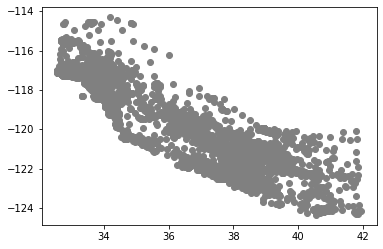

In [64]:
plt.scatter(df_train['latitude'],df_train['longitude'],c='grey')

In [81]:
location_dict = {'San Francisco':(37.77,-122.41),'Los Angeles':(34.25,-118.24)}

def find_closest_cities(df):
    for city in location_dict:
        lat = location_dict[city][0]
        lon = location_dict[city][1]
        dist = np.sqrt(np.square(df['latitude']-lat)
                                    +np.square(df['longitude']-lon))
        try:
            df['closest_city'] = np.where(df['dis_city']>dist,city,df['closest_city'])
            df['dis_city']= np.where(df['dis_city']>dist,dist,df['dis_city'])
        except:
            df['dis_city'] = dist
            df['closest_city'] = city
    return (df['dis_city'],df['closest_city'])

df_train['dis_city'] ,df_train['closest_city'] = find_closest_cities(df_train)
df_test['dis_city'] ,df_test['closest_city'] = find_closest_cities(df_test)

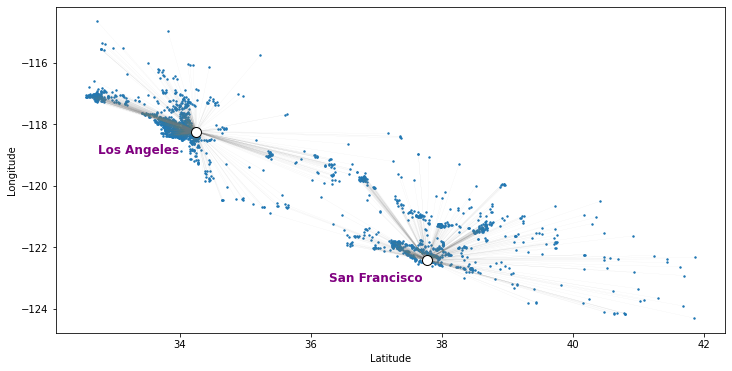

In [138]:
df_sample = df_train.sample(2000).reset_index()
plt.figure(figsize=(12,6))
for i in range(2000):
    x1 = location_dict[df_sample.loc[i,'closest_city']][0]
    y1 = location_dict[df_sample.loc[i,'closest_city']][1]
    x2 = df_sample.loc[i,'latitude']
    y2 = df_sample.loc[i,'longitude']
    plt.plot([x1,x2],[y1,y2],c='grey',linewidth=0.1,alpha=0.3)
plt.scatter('latitude','longitude',data=df_sample,s=2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
for city in location_dict:
    plt.plot(location_dict[city][0],location_dict[city][1],marker='o',
             markeredgecolor='black',markerfacecolor='white',markersize=10)
    plt.text(location_dict[city][0]-1.5,location_dict[city][1]-0.7,city,color='purple',fontsize=12,fontweight= 'heavy')

In [74]:
df_train.sample(1000).reset_index()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,diagonal,PCA_1,PCA_2,dis_city,closest_city
0,13531,-117.32,34.19,6.0,1068.0,182.0,999.0,188.0,4.7222,109000.0,INLAND,-83.13,-2.576474,0.658740,0.921954,Los Angeles
1,7717,-118.13,33.94,34.0,522.0,138.0,373.0,139.0,3.5481,265000.0,<1H OCEAN,-84.19,-2.206078,-0.103760,0.328938,Los Angeles
2,17388,-120.45,34.97,25.0,1920.0,380.0,1434.0,388.0,3.0368,129300.0,<1H OCEAN,-85.48,0.130515,-1.095544,2.324328,Los Angeles
3,8843,-118.39,34.09,27.0,4312.0,1214.0,1634.0,1097.0,3.6207,362500.0,<1H OCEAN,-84.30,-1.918962,-0.191306,0.219317,Los Angeles
4,13715,-117.17,34.12,3.0,15695.0,2248.0,6080.0,1920.0,6.2178,173900.0,INLAND,-83.05,-2.730035,0.720539,1.077868,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2930,-119.00,35.36,39.0,896.0,217.0,805.0,197.0,1.2500,42500.0,INLAND,-83.64,-0.574573,0.230145,1.345251,Los Angeles
996,12834,-121.44,38.69,24.0,3124.0,556.0,1512.0,555.0,3.1942,94900.0,INLAND,-82.75,3.524388,0.721081,1.336899,San Francisco
997,1846,-122.28,37.90,52.0,1369.0,249.0,490.0,248.0,4.1212,287500.0,NEAR BAY,-84.38,3.520730,-0.432039,0.183848,San Francisco
998,3478,-118.51,34.28,29.0,4239.0,653.0,1890.0,631.0,6.3911,301700.0,<1H OCEAN,-84.23,-1.698209,-0.149252,0.271662,Los Angeles


In [26]:
df_train = np.where(df_train['dis_la']>df_train['dis_sf'],'LA','SF')

array(['SF', 'LA', 'SF', ..., 'SF', 'SF', 'SF'], dtype='<U2')

In [43]:
location_dict = {'San Francisco':(37.77,-122.41),'Los Angeles':(34.25,-118.24)}
location_dict.keys()

dict_keys(['San Francisco', 'Los Angeles'])

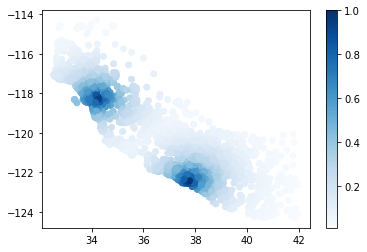

In [7]:
plt.scatter('latitude','longitude',c='dis_city_exp',cmap='Blues',data=df_train)
plt.colorbar()

In [8]:
df_train[['latitude','longitude','dis_city']]

,latitude,longitude,dis_city
3072,35.78,-119.23,1.822361
17470,34.47,-119.81,1.585339
19448,37.68,-121.02,1.392911
14425,32.80,-117.25,1.755733
2973,35.34,-119.08,1.376118
...,...,...,...
13323,34.06,-117.64,0.629365
16918,37.57,-122.35,0.208806
11919,33.95,-117.42,0.873155
20370,34.18,-118.90,0.663702


In [9]:
df_train['dis_city'].describe()

count    16512.000000
mean         0.945203
std          0.814038
min          0.000000
25%          0.313209
50%          0.623659
75%          1.426140
max          4.646429
Name: dis_city, dtype: float64